#####  Disclaimer
This lesson is based on code, documentation and web pages freely available on the Internet.
Among others:
https://www.machinelearningplus.com/time-series/time-series-analysis-python/
www.pieriandata.com

## Time Series Analysis in Python

* A time series is a sequence of observations recorded at regular time intervals.
* Analysis helps in understanding the TS's characteristics (anomalies, values forecasting)

In [1]:
#Import libs
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#import data from csv file
ts = pd.read_csv('./data.csv')

In [2]:
#here is the data
ts

,TIME,VALUE
0,00:01:00,10.910744
1,00:02:00,11.048482
2,00:03:00,11.133769
3,00:04:00,11.110492
4,00:05:00,11.069943
...,...,...
1435,23:56:00,12.582168
1436,23:57:00,12.217339
1437,23:58:00,12.155676
1438,23:59:00,12.133228


In [3]:
ts.describe()

,VALUE
count,1440.000000
mean,11.532385
std,1.242922
min,8.570152
25%,10.584160
50%,11.530531
75%,12.419843
max,14.440896


In [4]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TIME    1440 non-null   object 
 1    VALUE  1440 non-null   float64
dtypes: float64(1), object(1)
memory usage: 22.6+ KB


In [5]:
#import as a Time Series -> parse_dates=[0], index_col=0
ts = pd.read_csv('./data.csv', header=0, parse_dates=[0], index_col=0)
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1440 entries, 2022-12-21 00:01:00 to 2022-12-21 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0    VALUE  1440 non-null   float64
dtypes: float64(1)
memory usage: 22.5 KB


In [6]:
ts.describe()

,VALUE
count,1440.000000
mean,11.532385
std,1.242922
min,8.570152
25%,10.584160
50%,11.530531
75%,12.419843
max,14.440896


In [6]:
ts.index

DatetimeIndex(['2022-12-21 00:01:00', '2022-12-21 00:02:00',
               '2022-12-21 00:03:00', '2022-12-21 00:04:00',
               '2022-12-21 00:05:00', '2022-12-21 00:06:00',
               '2022-12-21 00:07:00', '2022-12-21 00:08:00',
               '2022-12-21 00:09:00', '2022-12-21 00:10:00',
               ...
               '2022-12-21 23:51:00', '2022-12-21 23:52:00',
               '2022-12-21 23:53:00', '2022-12-21 23:54:00',
               '2022-12-21 23:55:00', '2022-12-21 23:56:00',
               '2022-12-21 23:57:00', '2022-12-21 23:58:00',
               '2022-12-21 23:59:00', '2022-12-21 00:00:00'],
              dtype='datetime64[ns]', name='TIME', length=1440, freq=None)

Please, note freq=None

In [7]:
#force a resempling process with the same period (T = second)
tsr = ts.resample(rule='T').mean()

In [8]:
tsr.index

DatetimeIndex(['2022-12-21 00:00:00', '2022-12-21 00:01:00',
               '2022-12-21 00:02:00', '2022-12-21 00:03:00',
               '2022-12-21 00:04:00', '2022-12-21 00:05:00',
               '2022-12-21 00:06:00', '2022-12-21 00:07:00',
               '2022-12-21 00:08:00', '2022-12-21 00:09:00',
               ...
               '2022-12-21 23:50:00', '2022-12-21 23:51:00',
               '2022-12-21 23:52:00', '2022-12-21 23:53:00',
               '2022-12-21 23:54:00', '2022-12-21 23:55:00',
               '2022-12-21 23:56:00', '2022-12-21 23:57:00',
               '2022-12-21 23:58:00', '2022-12-21 23:59:00'],
              dtype='datetime64[ns]', name='TIME', length=1440, freq='T')

<AxesSubplot: xlabel='TIME'>

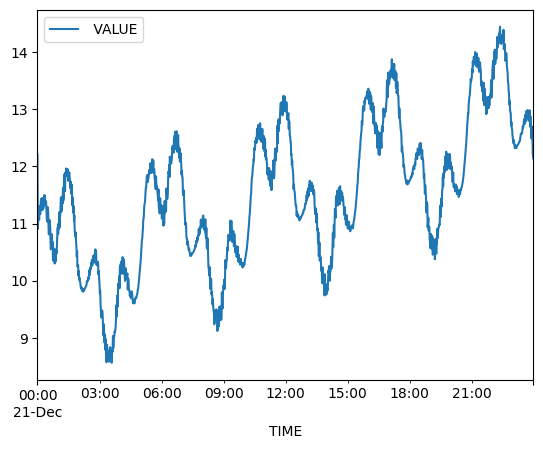

In [9]:
tsr.plot()

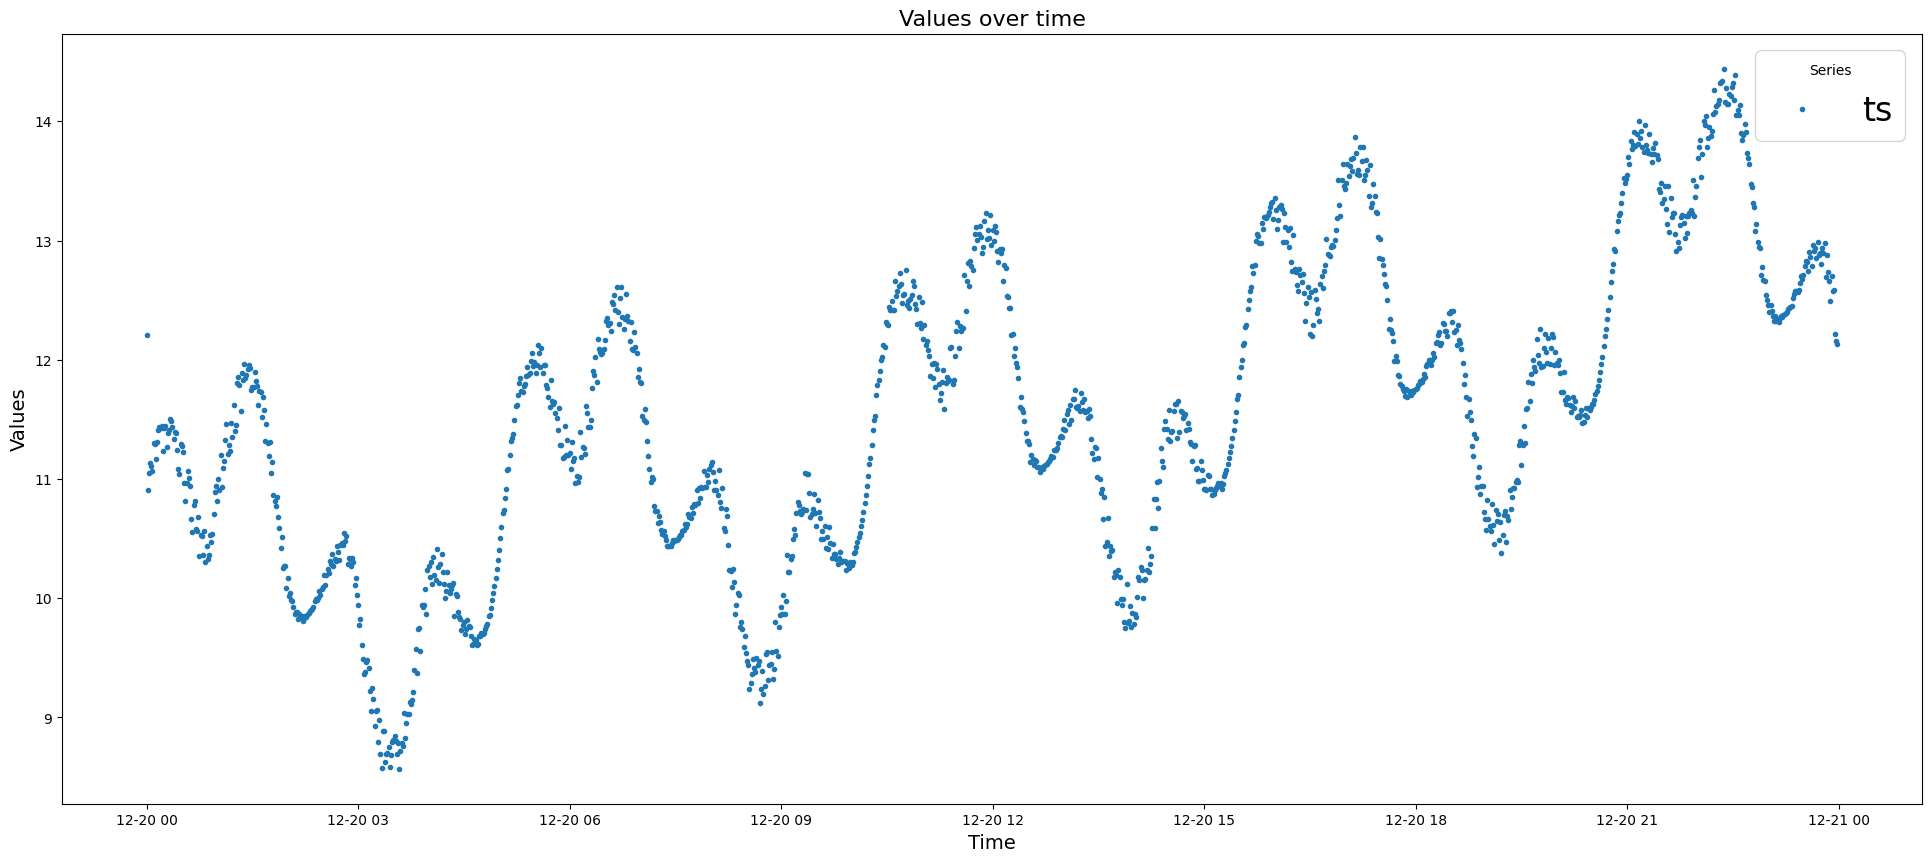

In [17]:
plt.figure(figsize=(24,10), dpi=100)
#add axes labels and a title
plt.ylabel('Values', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Values over time', fontsize=16)

plt.plot(tsr,".",label = 'ts')
#add legend
plt.legend(title='Series', fontsize=24)

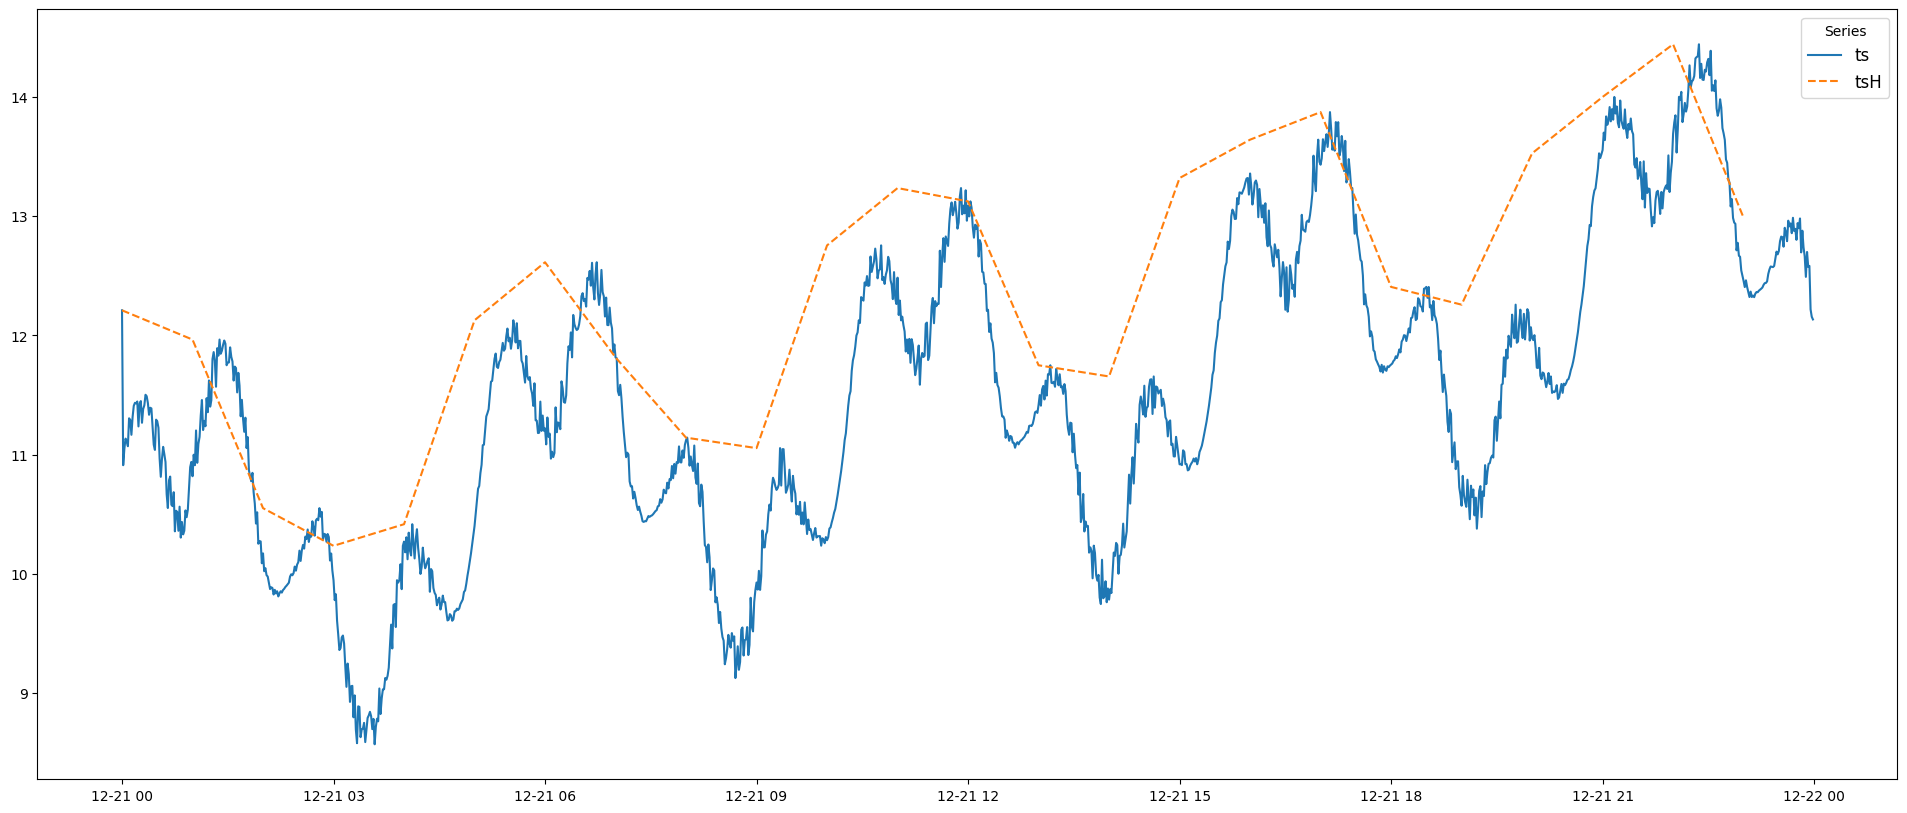

In [10]:
#Example of resampling - check rule and mean/max/min
tsrH = ts.resample(rule='H').max()
plt.figure(figsize=(24,10), dpi=100)
plt.plot(tsr,"-",label = 'ts')
plt.plot(tsrH,"--",label = 'tsH')
#add legend
plt.legend(title='Series', fontsize=12)

In [11]:
tsrS = ts.shift(30)
tsrS

,VALUE
TIME,
2022-12-21 00:01:00,NaN
2022-12-21 00:02:00,NaN
2022-12-21 00:03:00,NaN
2022-12-21 00:04:00,NaN
2022-12-21 00:05:00,NaN
...,...
2022-12-21 23:56:00,12.581534
2022-12-21 23:57:00,12.644172
2022-12-21 23:58:00,12.701931


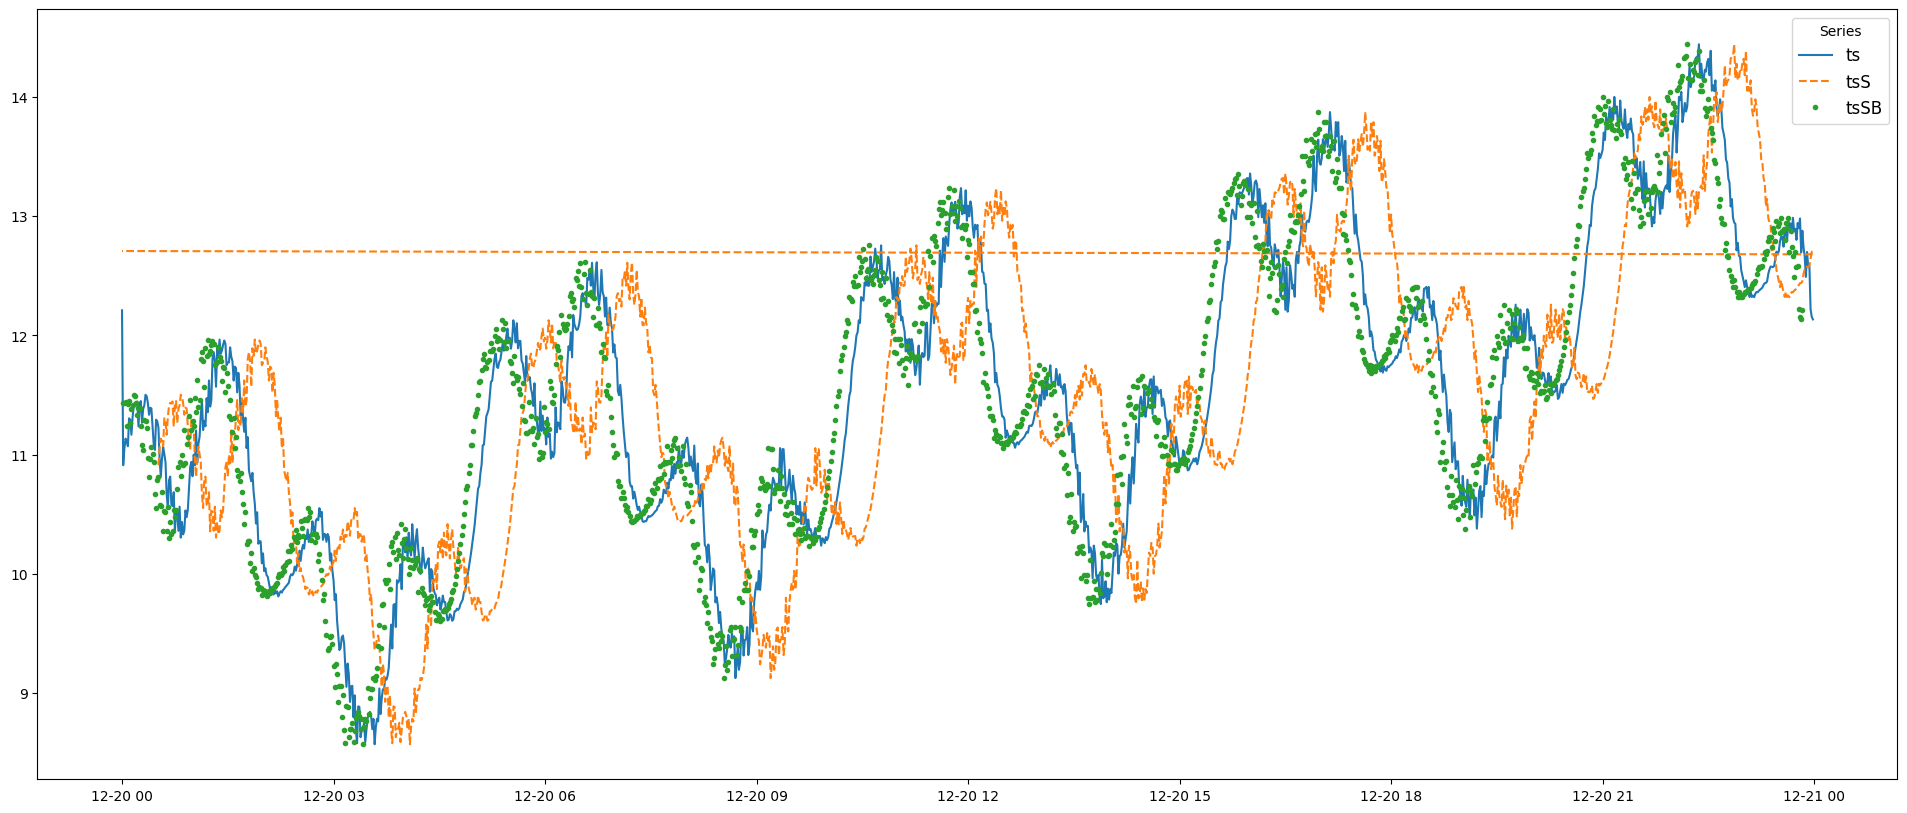

In [14]:
#Example of shift - check value and NaN
tsrS = ts.shift(30)
tsrSB = ts.shift(-10)
plt.figure(figsize=(24,10), dpi=100)
plt.plot(tsr,"-",label = 'ts')
plt.plot(tsrS,"--",label = 'tsS')
plt.plot(tsrSB,".",label = 'tsSB')
#add legend
plt.legend(title='Series', fontsize=12)

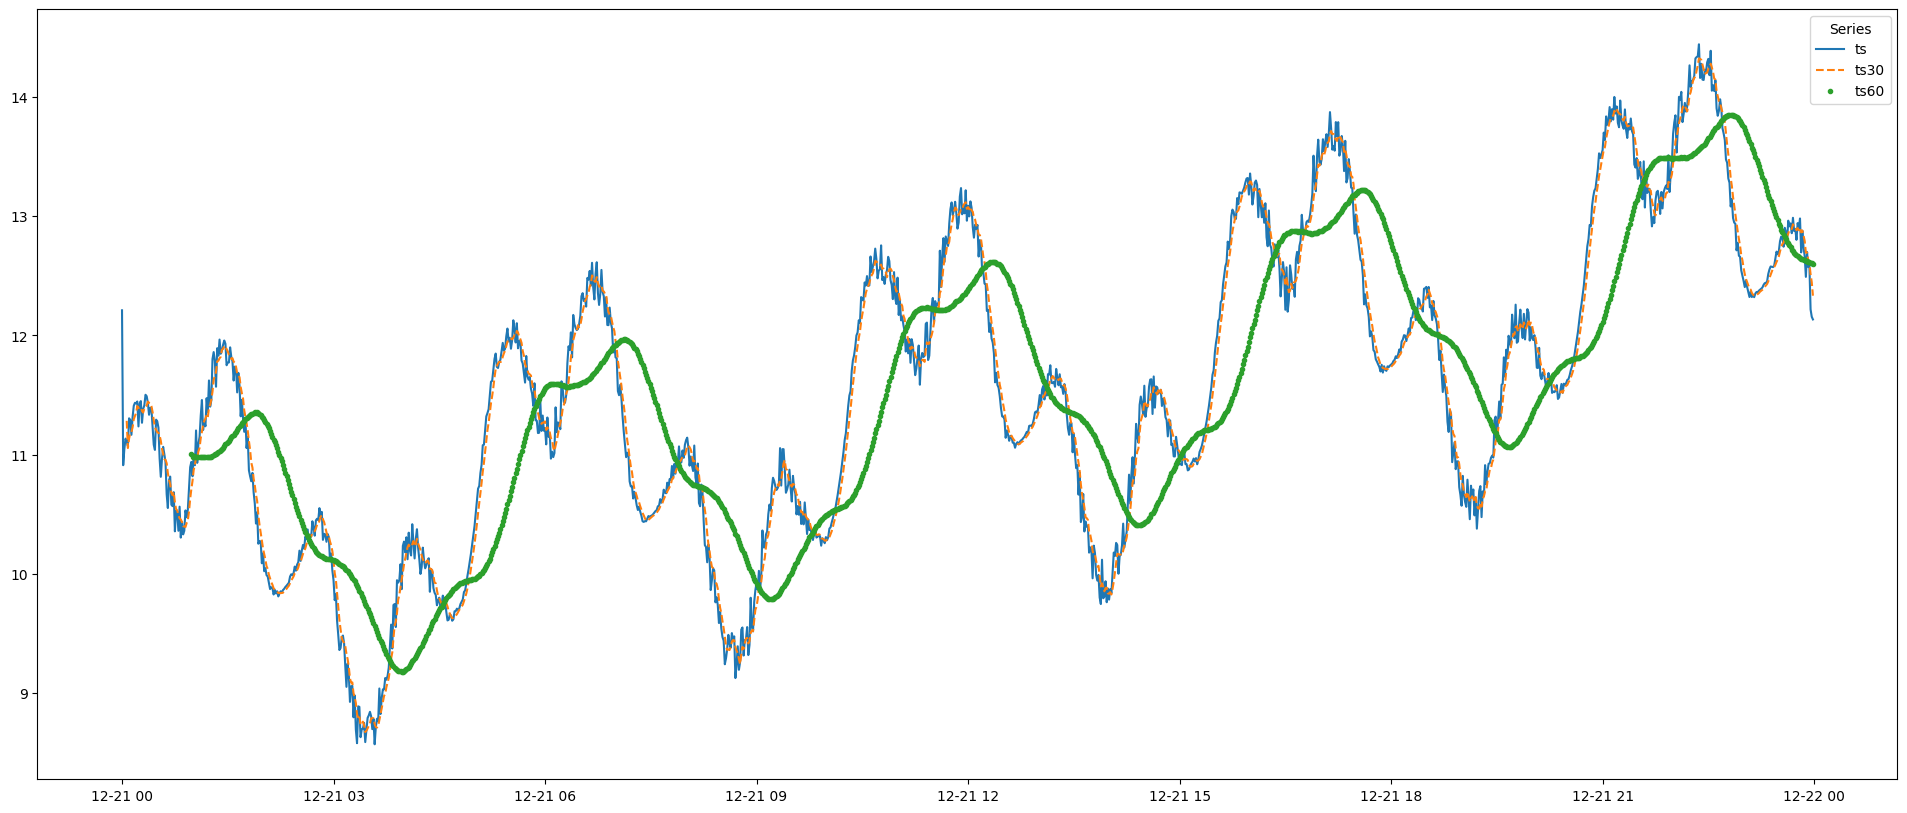

In [12]:
#Rolling (check NaN)
tsrR30 = tsr.rolling(window=5).mean()
tsrR60 = tsr.rolling(window=60).mean()
plt.figure(figsize=(24,10), dpi=100)
plt.plot(tsr,"-",label = 'ts')
plt.plot(tsrR30, "--", label = 'ts30')
plt.plot(tsrR60,".", label = 'ts60')


#add legend
plt.legend(title='Series')


### Smoothening of a time series 
Smoothening of a time series may be useful in:
* Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.
* The smoothed version of series can be used as a feature to explain the original series itself.
* Visualize the underlying trend better
It is possible to smoothen a series:
* moving average -> rolling
* Localized Regression -> LOESS smoothing (or LOWESS smoothing - W = Weighted)

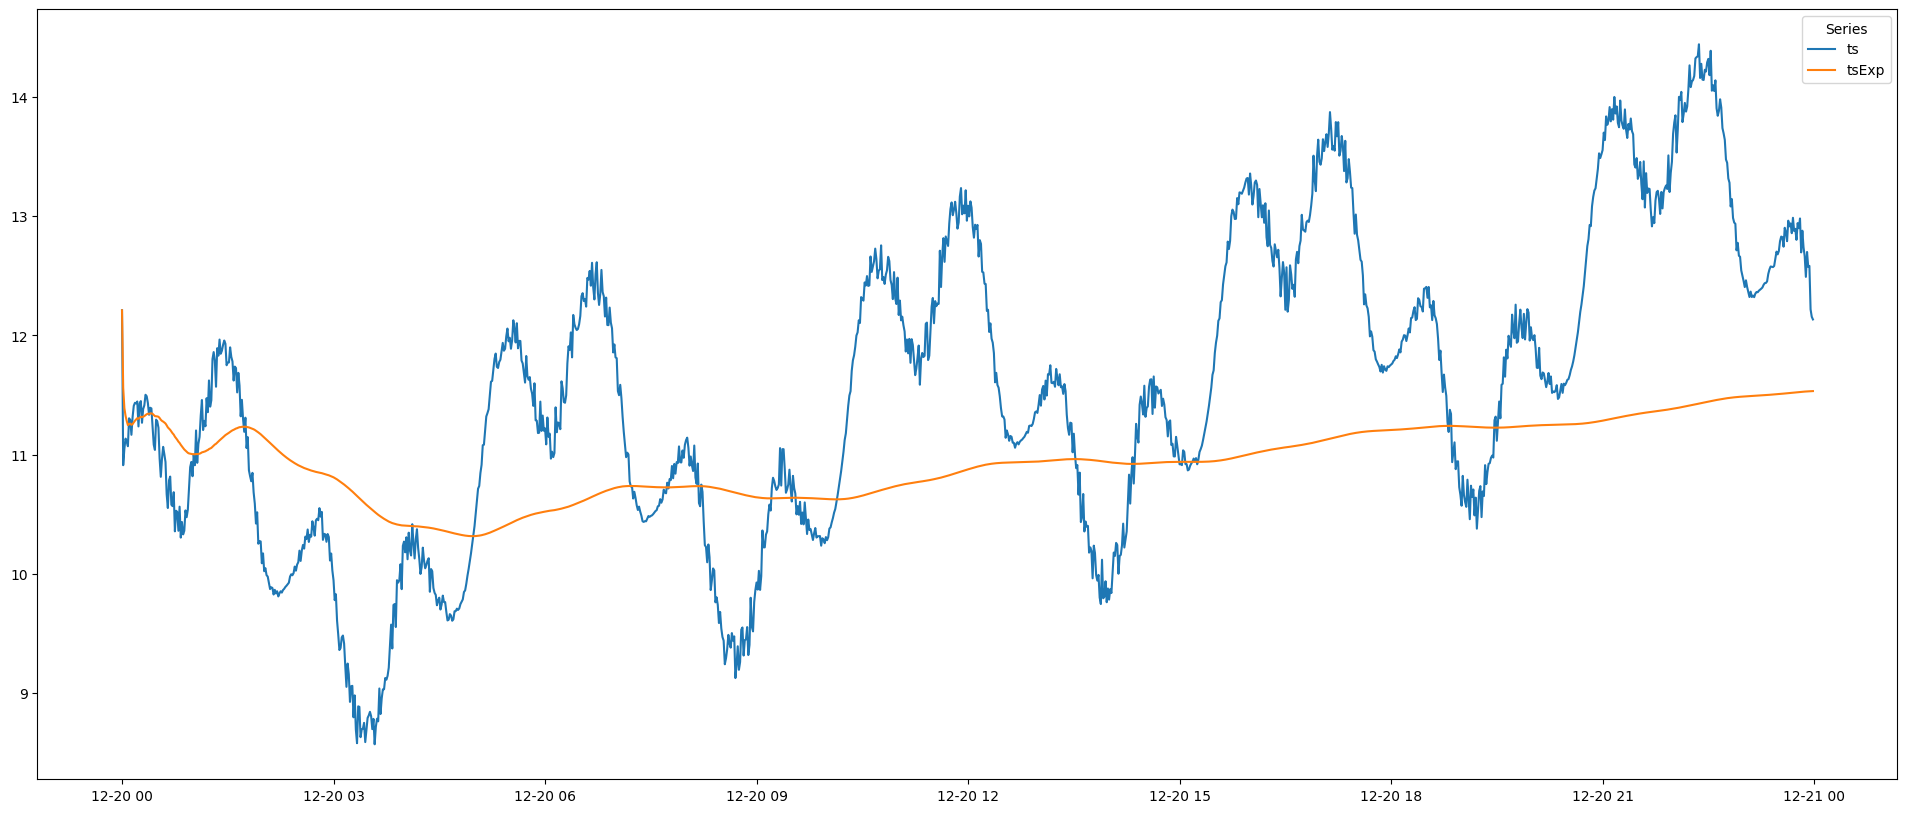

In [16]:
#Expanding: mean/max/min considering all the previous values (check with max)

tsrExp = tsr.expanding().mean()
plt.figure(figsize=(24,10), dpi=100)
plt.plot(tsr,"-",label = 'ts')
plt.plot(tsrExp,"-",label = 'tsExp')

#add legend
plt.legend(title='Series')